In [1]:
import os

# Limit the number of threads for various libraries
os.environ["MKL_NUM_THREADS"] = "12"  # For MKL (used by NumPy)
os.environ["NUMEXPR_NUM_THREADS"] = "12"  # For NumExpr
os.environ["VECLIB_MAXIMUM_THREADS"] = "12"  # For macOS Accelerate
os.environ["OPENBLAS_NUM_THREADS"] = "12"  # For OpenBLAS
os.environ["BLIS_NUM_THREADS"] = "12"  # For BLIS

# Print environment variables to verify
print("OMP_NUM_THREADS:", os.environ.get("OMP_NUM_THREADS"))
print("MKL_NUM_THREADS:", os.environ.get("MKL_NUM_THREADS"))
print("NUMEXPR_NUM_THREADS:", os.environ.get("NUMEXPR_NUM_THREADS"))
print("VECLIB_MAXIMUM_THREADS:", os.environ.get("VECLIB_MAXIMUM_THREADS"))
print("OPENBLAS_NUM_THREADS:", os.environ.get("OPENBLAS_NUM_THREADS"))
print("BLIS_NUM_THREADS:", os.environ.get("BLIS_NUM_THREADS"))

# Set PyTorch threads
import torch
torch.set_num_threads(18)
torch.set_num_interop_threads(18)

OMP_NUM_THREADS: None
MKL_NUM_THREADS: 12
NUMEXPR_NUM_THREADS: 12
VECLIB_MAXIMUM_THREADS: 12
OPENBLAS_NUM_THREADS: 12
BLIS_NUM_THREADS: 12


In [ ]:
print('Hello world!')

In [ ]:
# ========================= #
#  Setup and Data Loading
# ========================= #

import importlib
from project_root.dataset.dataset_loader import DatasetLoader
from project_root.dataset.representation_dataset import RepresentationDataset
from project_root.dataset.wrapped_representation_dataset import WrappedRepresentationDataset
from project_root.dataset.data_loader_factory import DataLoaderFactory

# Set dataset folder path
path_dataset_folder = "../dataset/predictor_dataset.csv"

# Load dataset
dataset_loader = DatasetLoader(path_dataset_folder)
print('Dataset loaded')
df = dataset_loader.load_dataframe()
print('Dataframe loaded')
embeddings_dict, attention_weights_dict = dataset_loader.load_embeddings_and_attention()
print('Embeddings and attention_weights loaded')

# Print some keys to verify loading
print(f"Loaded dataset shape: {df.shape}")
print(f"First 5 UniProt IDs in embeddings: {list(embeddings_dict.keys())[:5]}")
print(f"First 5 UniProt IDs in attention weights: {list(attention_weights_dict.keys())[:5]}")

In [ ]:
# ========================= #
#  Initialize RepresentationDataset
# ========================= #

# Create instance
representation_dataset = RepresentationDataset(
    dataframe=df,
    embeddings=embeddings_dict,
    attention_weights=attention_weights_dict
)

In [4]:
wrapped_dataset_1000 = WrappedRepresentationDataset(representation_dataset, random_projection_dim=1000)

Converting embeddings and attention weights to NumPy arrays...
Applying random projection to reduce attention weights from 6255001 to 1000 dimensions...
Applying dimensionality reduction using None...


Converting embeddings and attention weights to NumPy arrays...
Applying dimensionality reduction using pca...
Applying PCA reduction to embeddings
The number of components required to explain the variance using the threshold method (0.95) is:
50
Applying PCA reduction to attention weights
The number of components required to explain the variance using the threshold method (0.95) is:
600


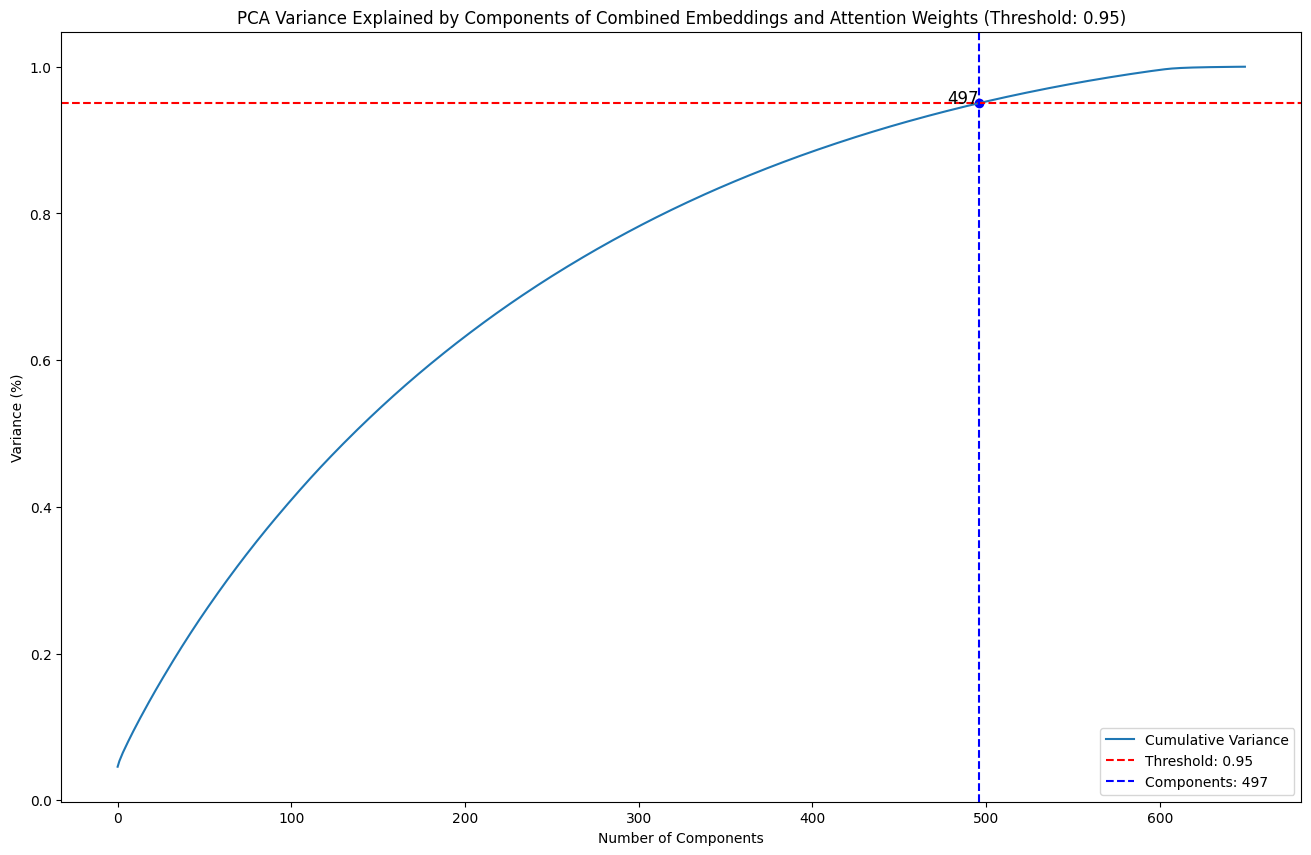

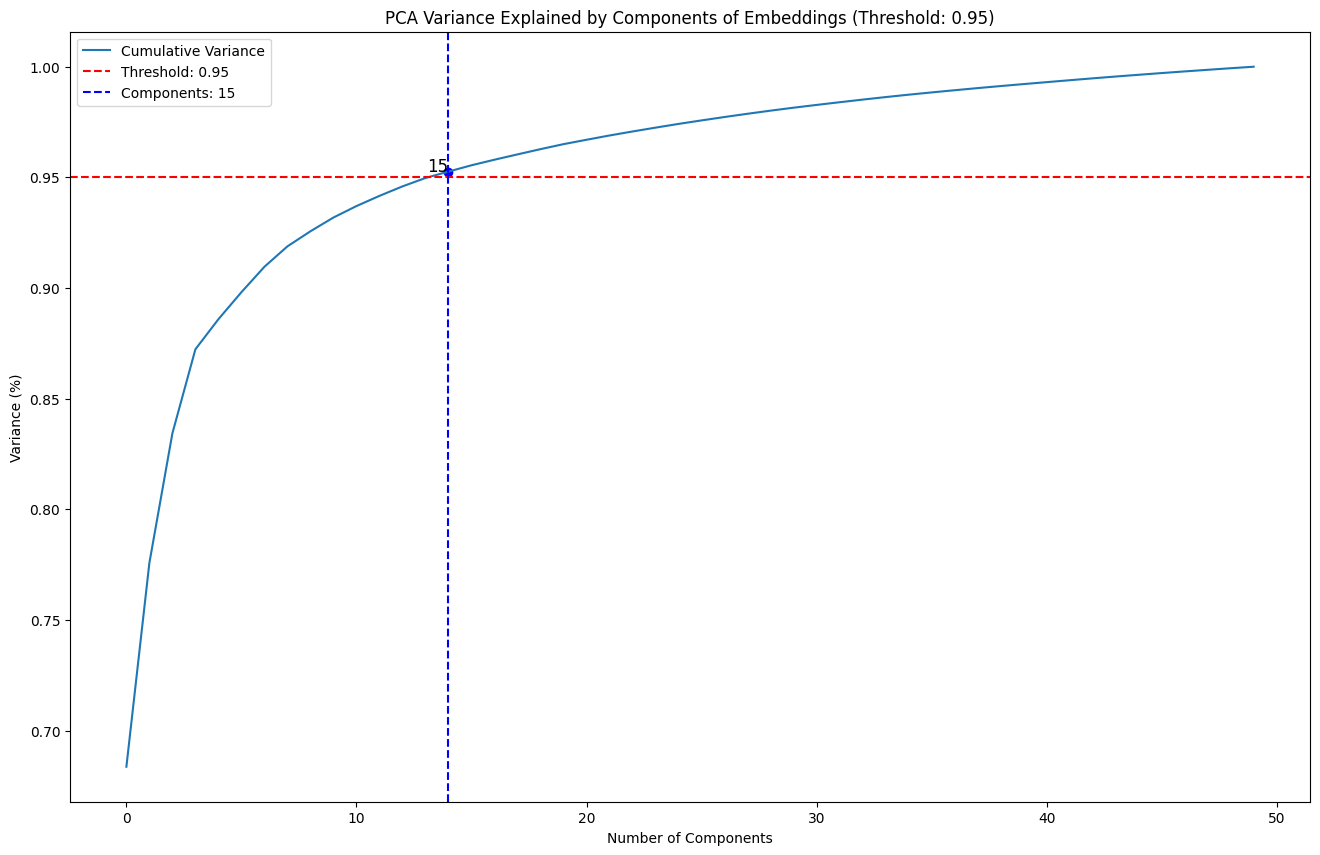

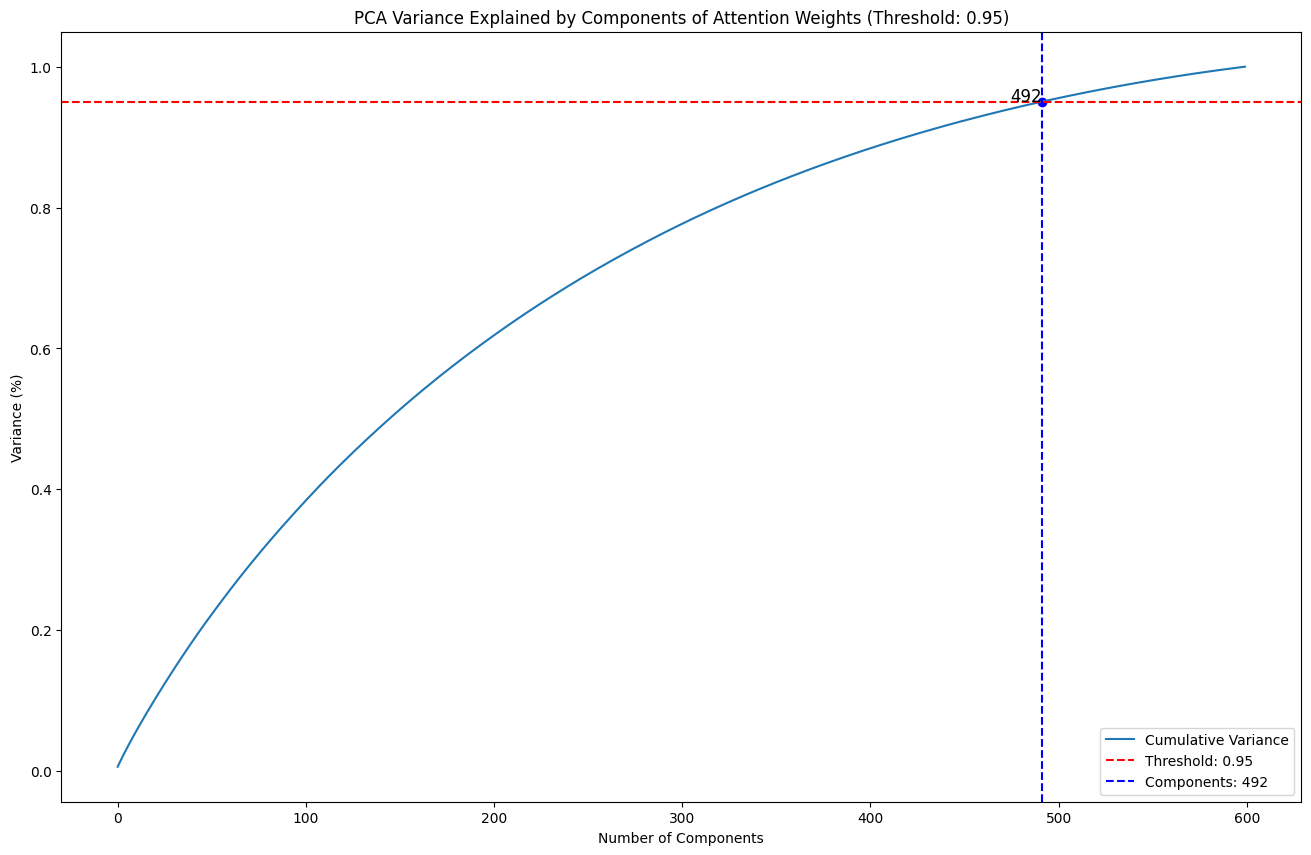

In [17]:
# ========================= #
#  Test WrappedRepresentationDataset
# ========================= #

# Create WrappedRepresentationDataset instance (PCA-reduced)
wrapped_dataset_pca_1000_95 = WrappedRepresentationDataset(wrapped_dataset_1000, reduce_method='pca', pca_method='threshold', threshold=0.95)

# Plot PCA variance
wrapped_dataset_pca_1000_95.plot_pca_variance(embeddings=True, attention_weights=True)
wrapped_dataset_pca_1000_95.plot_pca_variance(embeddings=True, attention_weights=False)
wrapped_dataset_pca_1000_95.plot_pca_variance(embeddings=False, attention_weights=True)

Converting embeddings and attention weights to NumPy arrays...
Applying dimensionality reduction using pca...
Applying PCA reduction to embeddings
The number of components required to explain the variance using the threshold method (0.98) is:
142
Applying PCA reduction to attention weights
The number of components required to explain the variance using the threshold method (0.98) is:
718


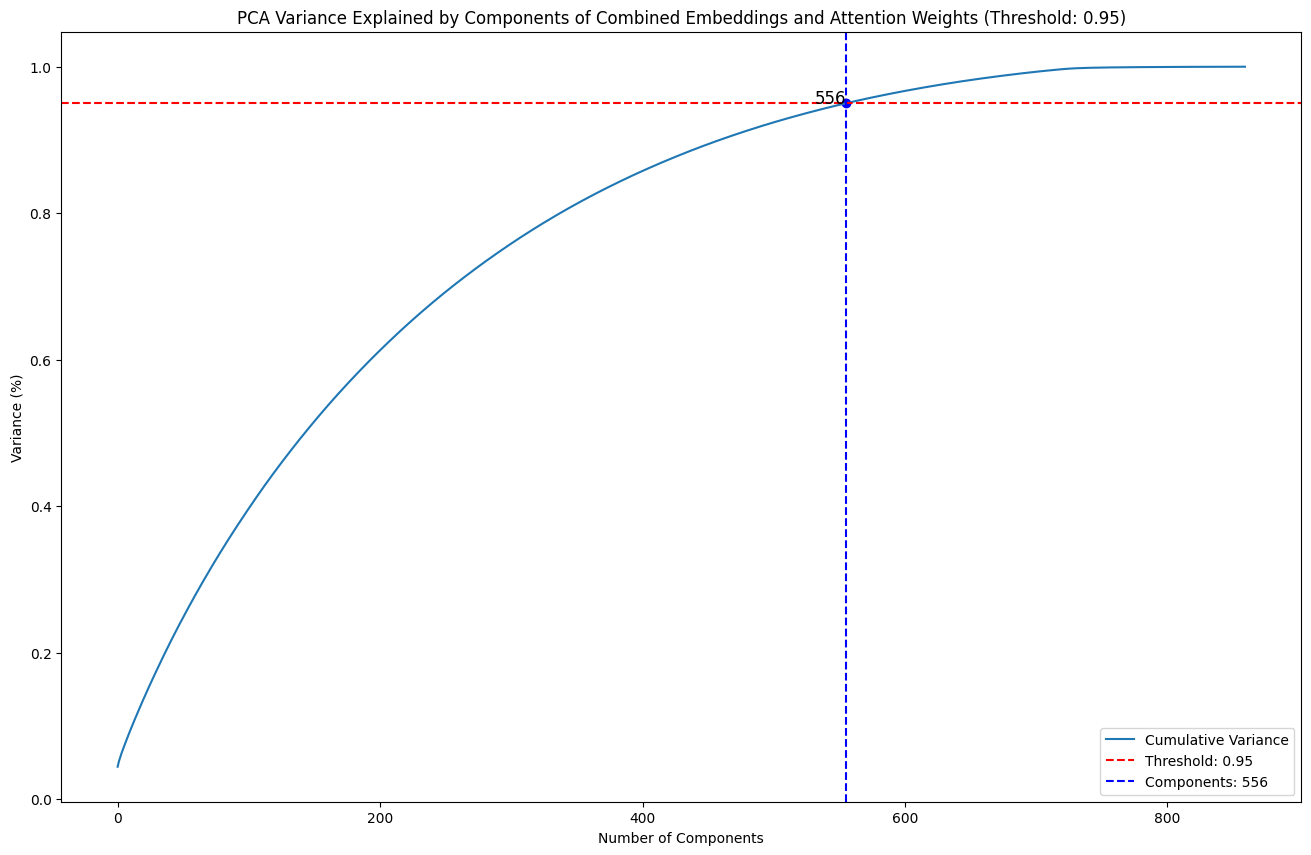

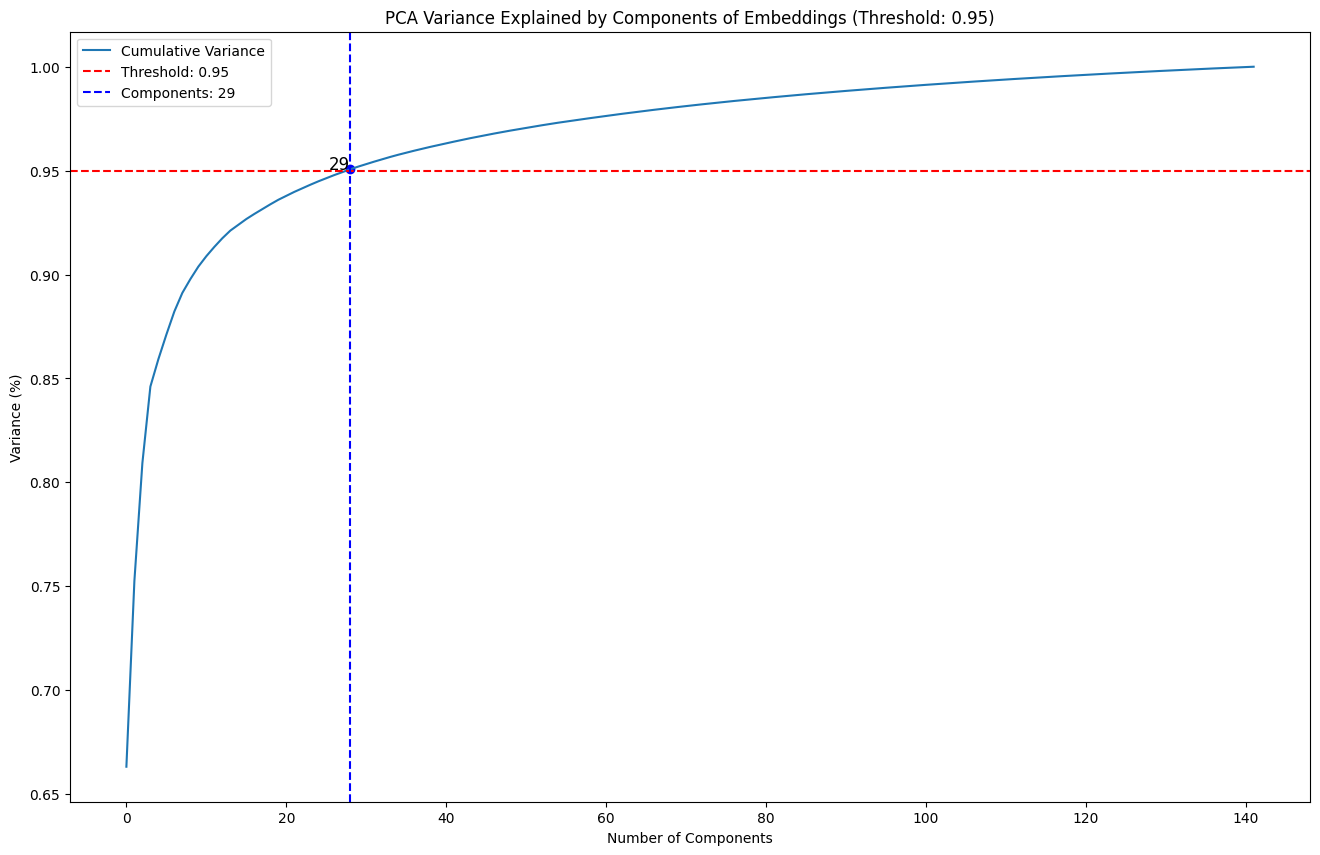

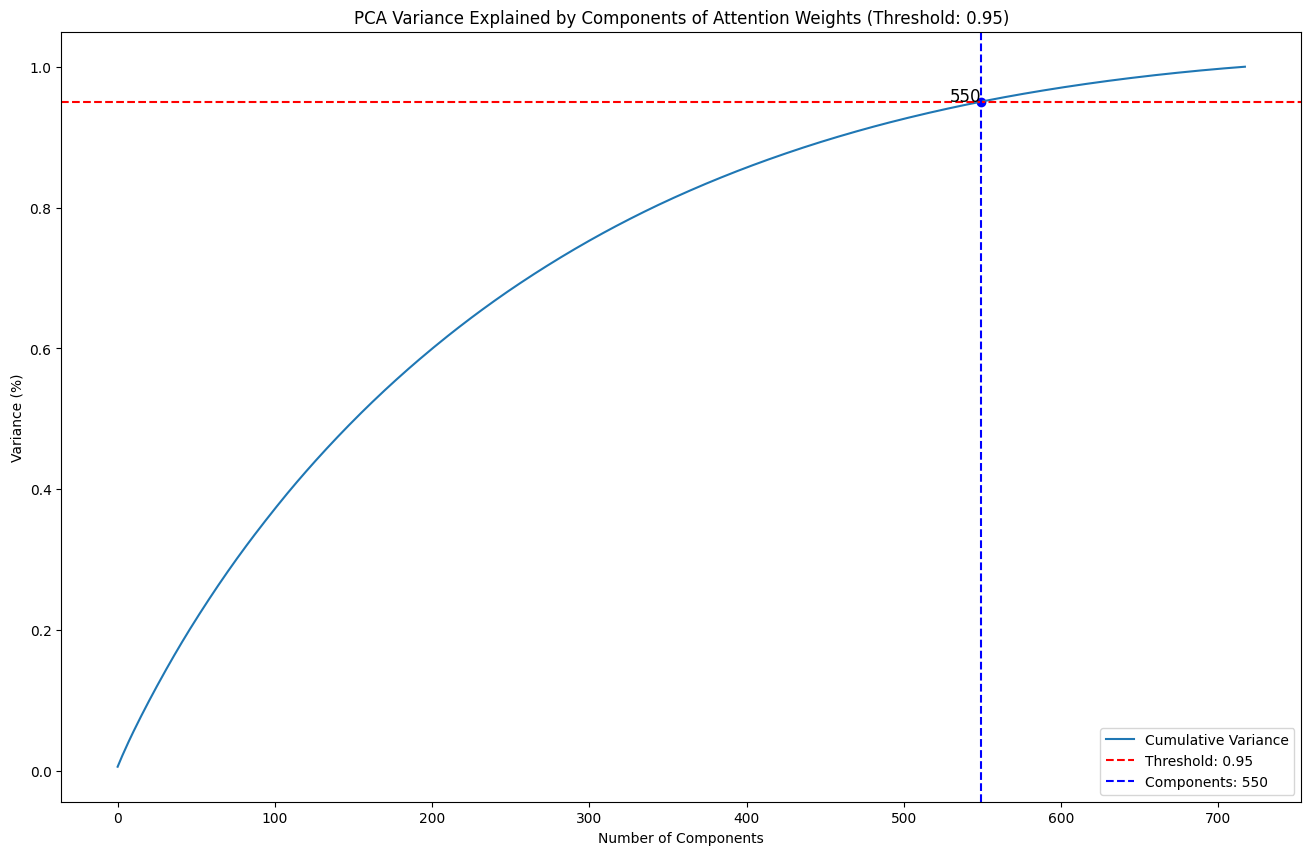

In [18]:
# Reload if needed
import project_root.dataset.wrapped_representation_dataset
importlib.reload(project_root.dataset.wrapped_representation_dataset)


# Create WrappedRepresentationDataset instance (PCA-reduced)
wrapped_dataset_pca_1000_98 = WrappedRepresentationDataset(wrapped_dataset_1000, reduce_method='pca', pca_method='threshold', threshold=0.98)

# Plot PCA variance
wrapped_dataset_pca_1000_98.plot_pca_variance(embeddings=True, attention_weights=True)
wrapped_dataset_pca_1000_98.plot_pca_variance(embeddings=True, attention_weights=False)
wrapped_dataset_pca_1000_98.plot_pca_variance(embeddings=False, attention_weights=True)

In [19]:
wrapped_dataset_1500 = WrappedRepresentationDataset(representation_dataset, random_projection_dim=1500)

Converting embeddings and attention weights to NumPy arrays...
Applying random projection to reduce attention weights from 6255001 to 1500 dimensions...


KeyboardInterrupt: 

Converting embeddings and attention weights to NumPy arrays...
Applying dimensionality reduction using pca...
Applying PCA reduction to embeddings
The number of components required to explain the variance using the threshold method (0.95) is:
50
Applying PCA reduction to attention weights
The number of components required to explain the variance using the threshold method (0.95) is:
712


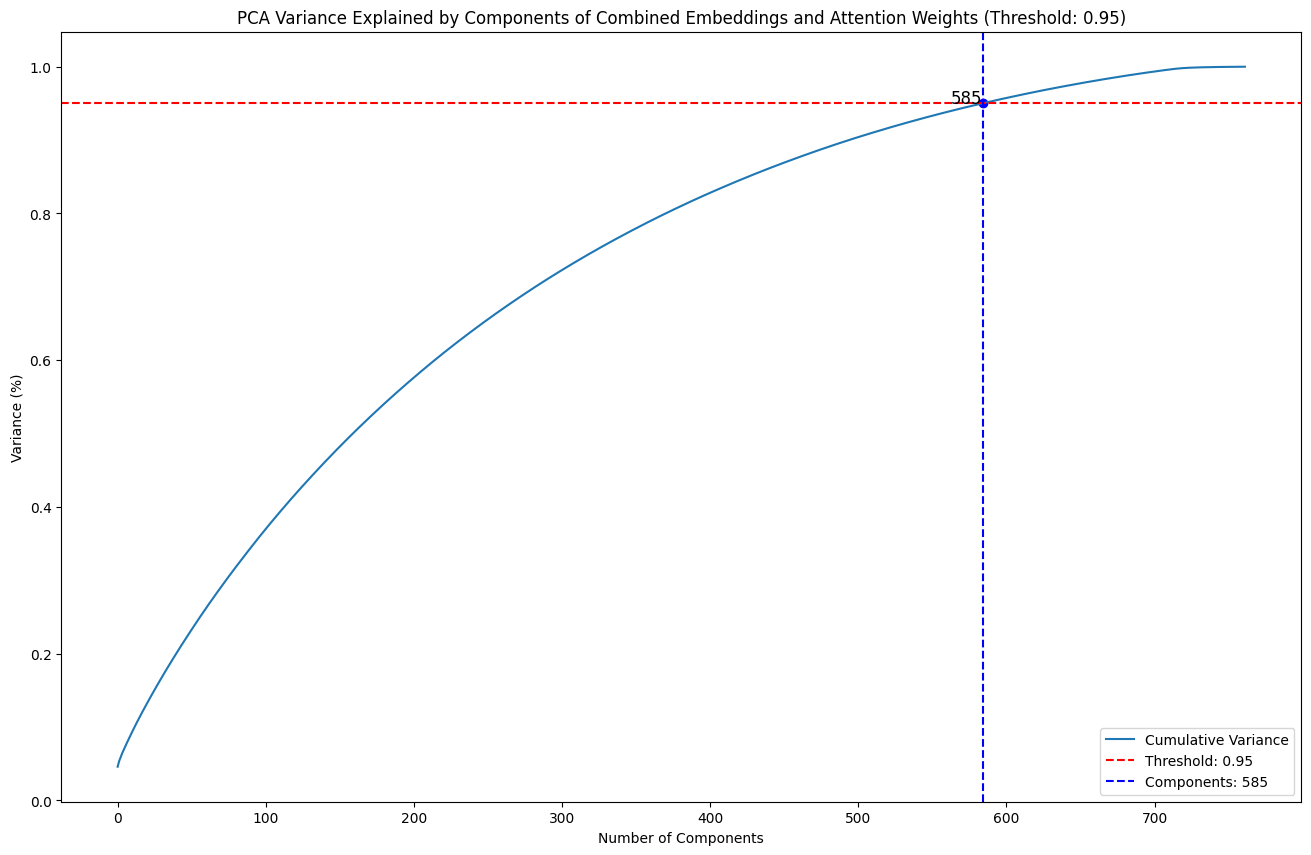

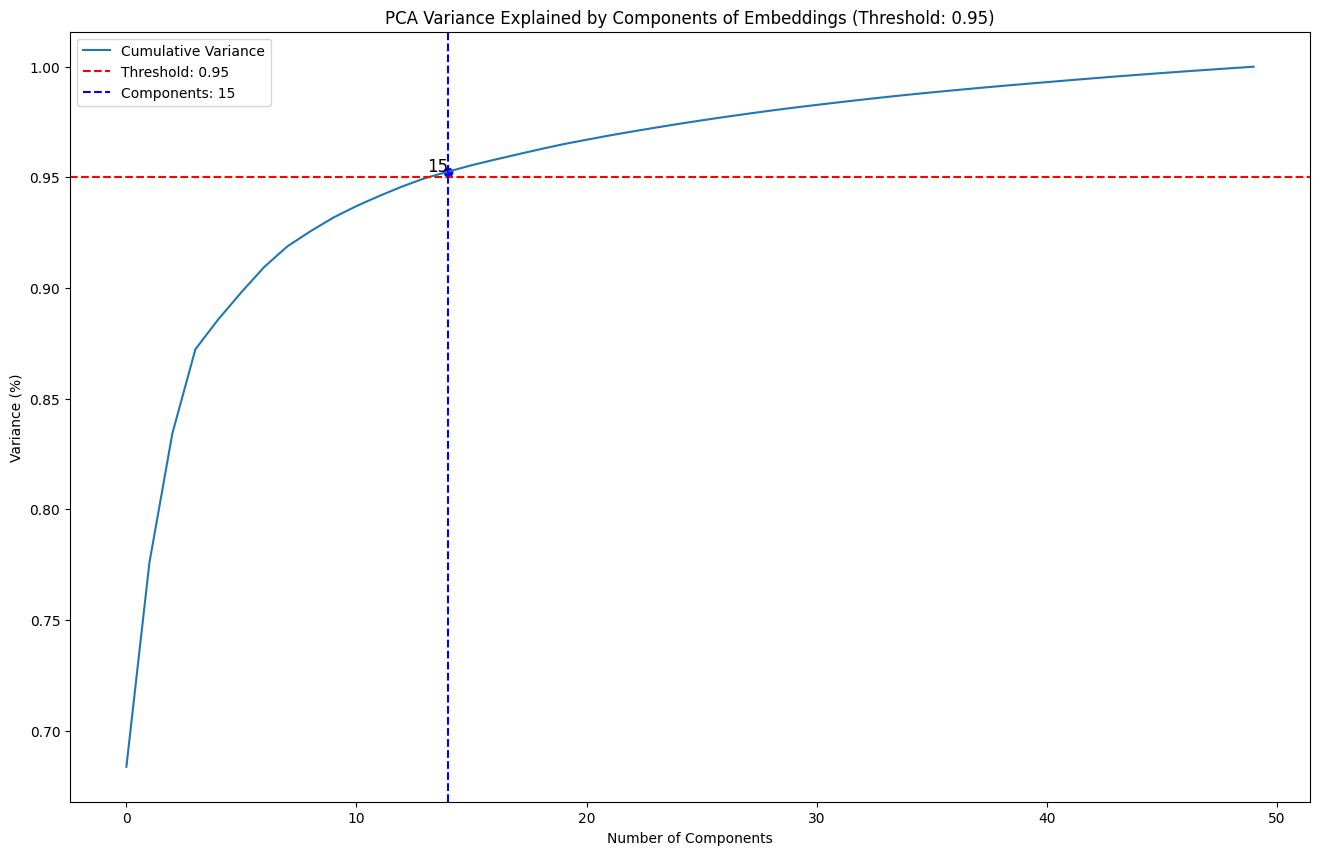

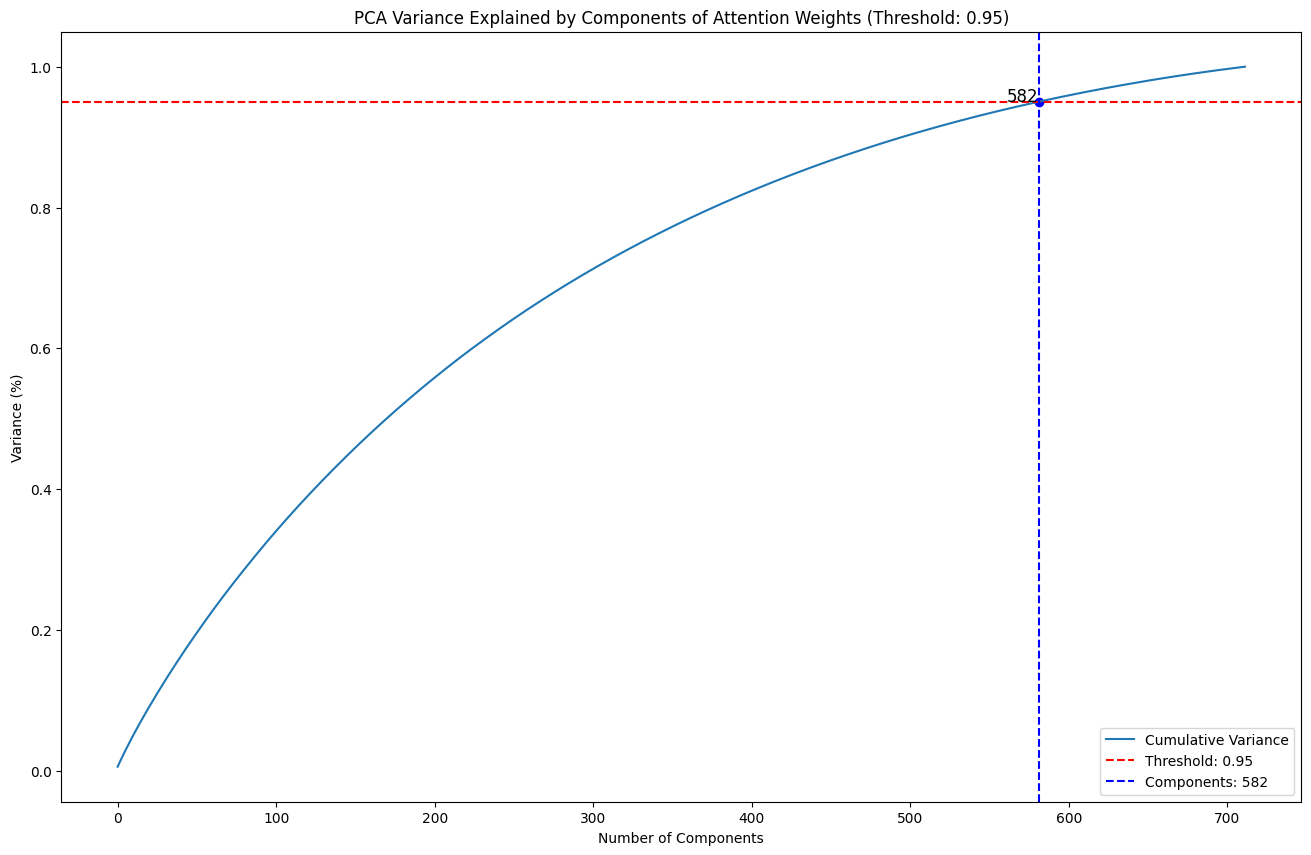

In [20]:
# Create WrappedRepresentationDataset instance (PCA-reduced)
wrapped_dataset_pca_1500_95 = WrappedRepresentationDataset(wrapped_dataset_1500, reduce_method='pca', pca_method='threshold', threshold=0.95, random_projection_dim=1500)

# Plot PCA variance
wrapped_dataset_pca_1500_95.plot_pca_variance(embeddings=True, attention_weights=True)
wrapped_dataset_pca_1500_95.plot_pca_variance(embeddings=True, attention_weights=False)
wrapped_dataset_pca_1500_95.plot_pca_variance(embeddings=False, attention_weights=True)

Converting embeddings and attention weights to NumPy arrays...
Applying dimensionality reduction using pca...
Applying PCA reduction to embeddings
The number of components required to explain the variance using the threshold method (0.95) is:
50
Applying PCA reduction to attention weights
The number of components required to explain the variance using the threshold method (0.95) is:
712


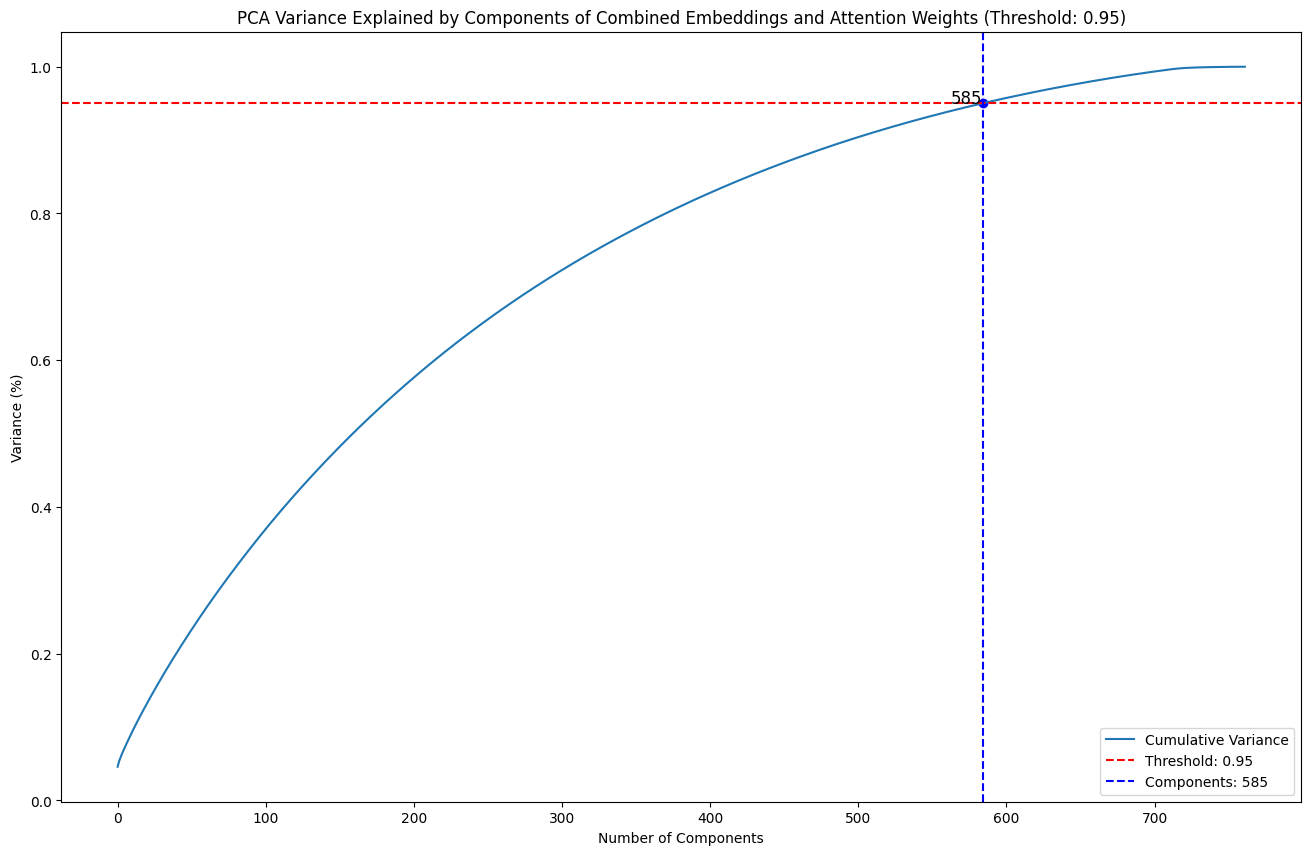

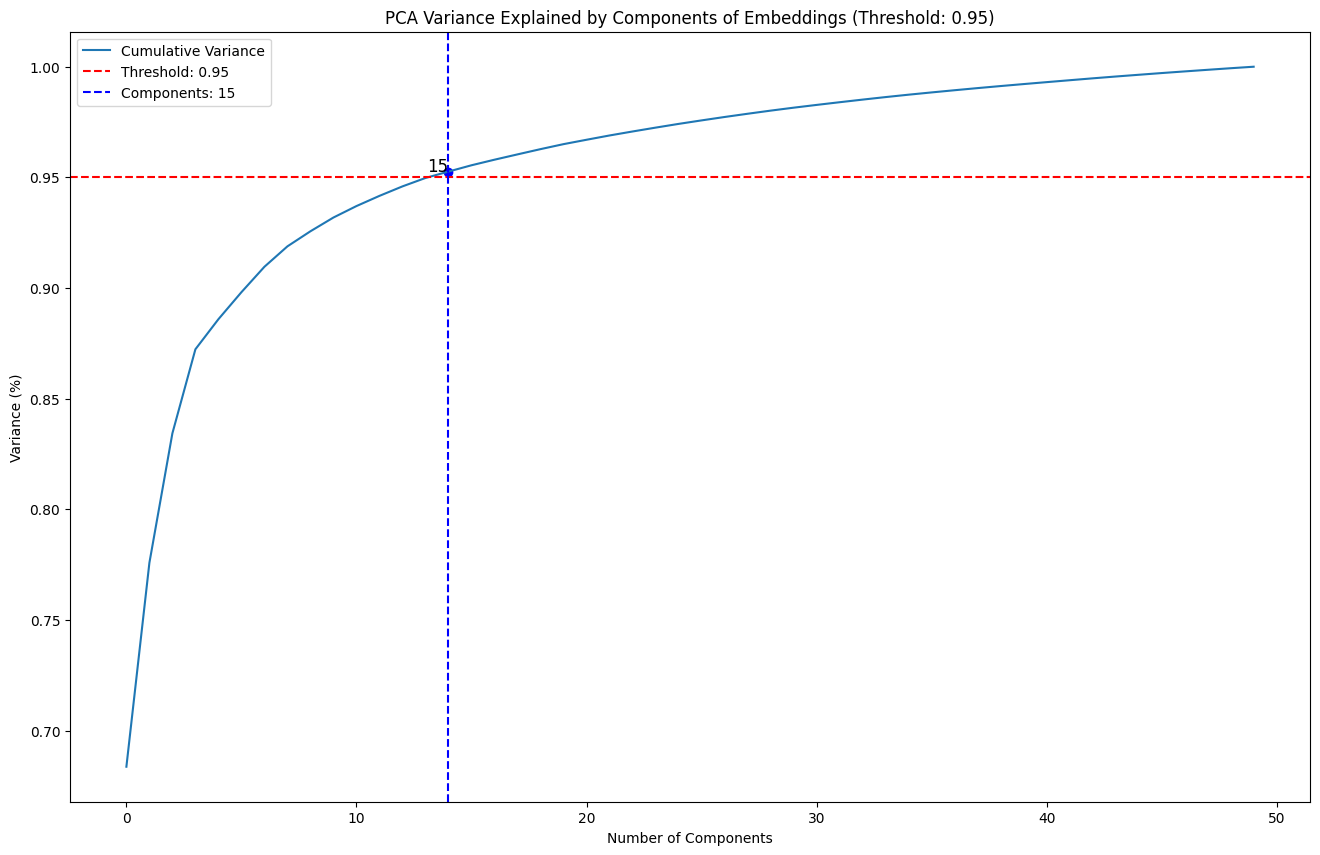

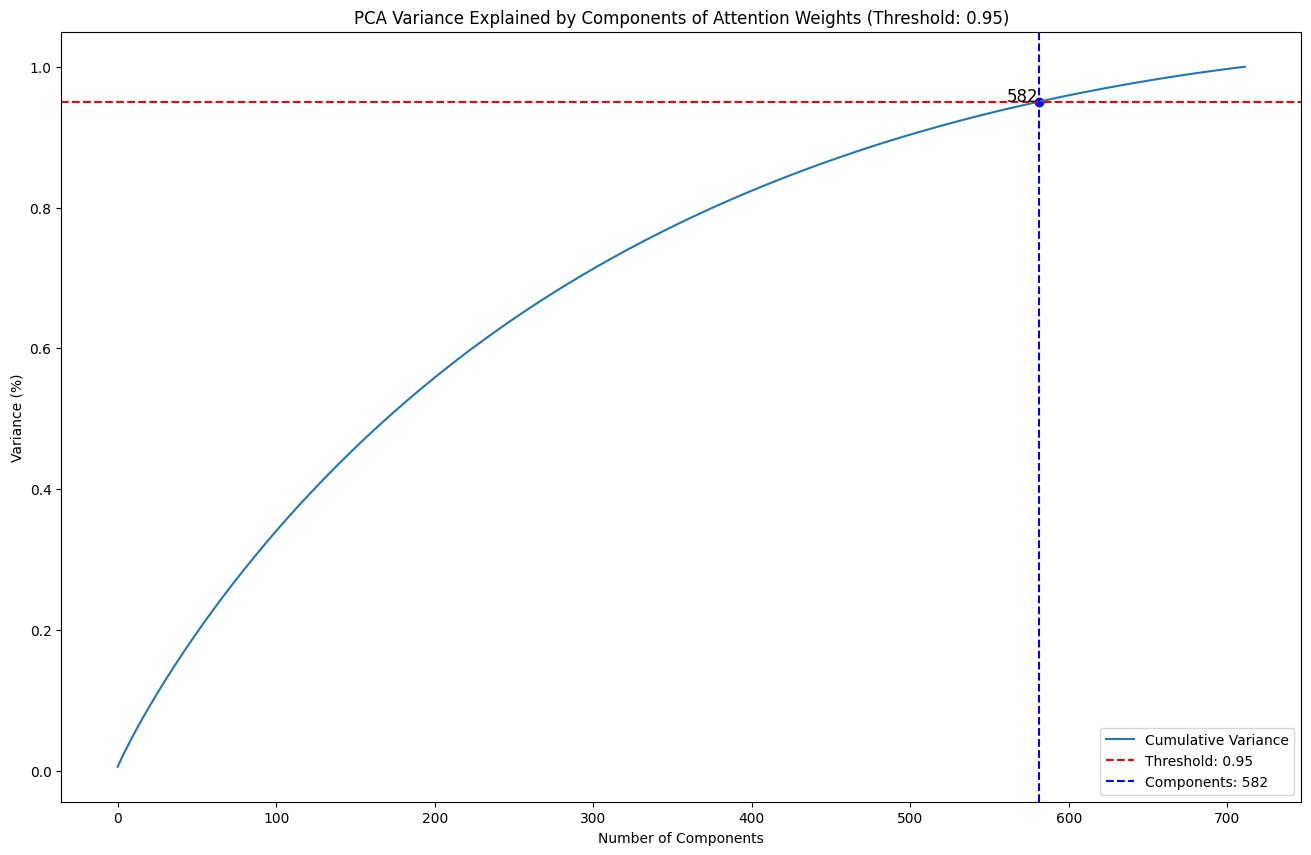

In [21]:
# Create WrappedRepresentationDataset instance (PCA-reduced)
wrapped_dataset_pca_1500_98 = WrappedRepresentationDataset(wrapped_dataset_1500, reduce_method='pca', pca_method='threshold', threshold=0.95, random_projection_dim=1500)

# Plot PCA variance
wrapped_dataset_pca_1500_98.plot_pca_variance(embeddings=True, attention_weights=True)
wrapped_dataset_pca_1500_98.plot_pca_variance(embeddings=True, attention_weights=False)
wrapped_dataset_pca_1500_98.plot_pca_variance(embeddings=False, attention_weights=True)

In [ ]:
wrapped_dataset_2000 = WrappedRepresentationDataset(representation_dataset, random_projection_dim=2000)

Converting embeddings and attention weights to NumPy arrays...
Applying random projection to reduce attention weights from 6255001 to 2000 dimensions...
Applying dimensionality reduction using None...


Converting embeddings and attention weights to NumPy arrays...
Applying dimensionality reduction using pca...
Applying PCA reduction to embeddings
The number of components required to explain the variance using the threshold method (0.95) is:
50
Applying PCA reduction to attention weights
The number of components required to explain the variance using the threshold method (0.95) is:
775


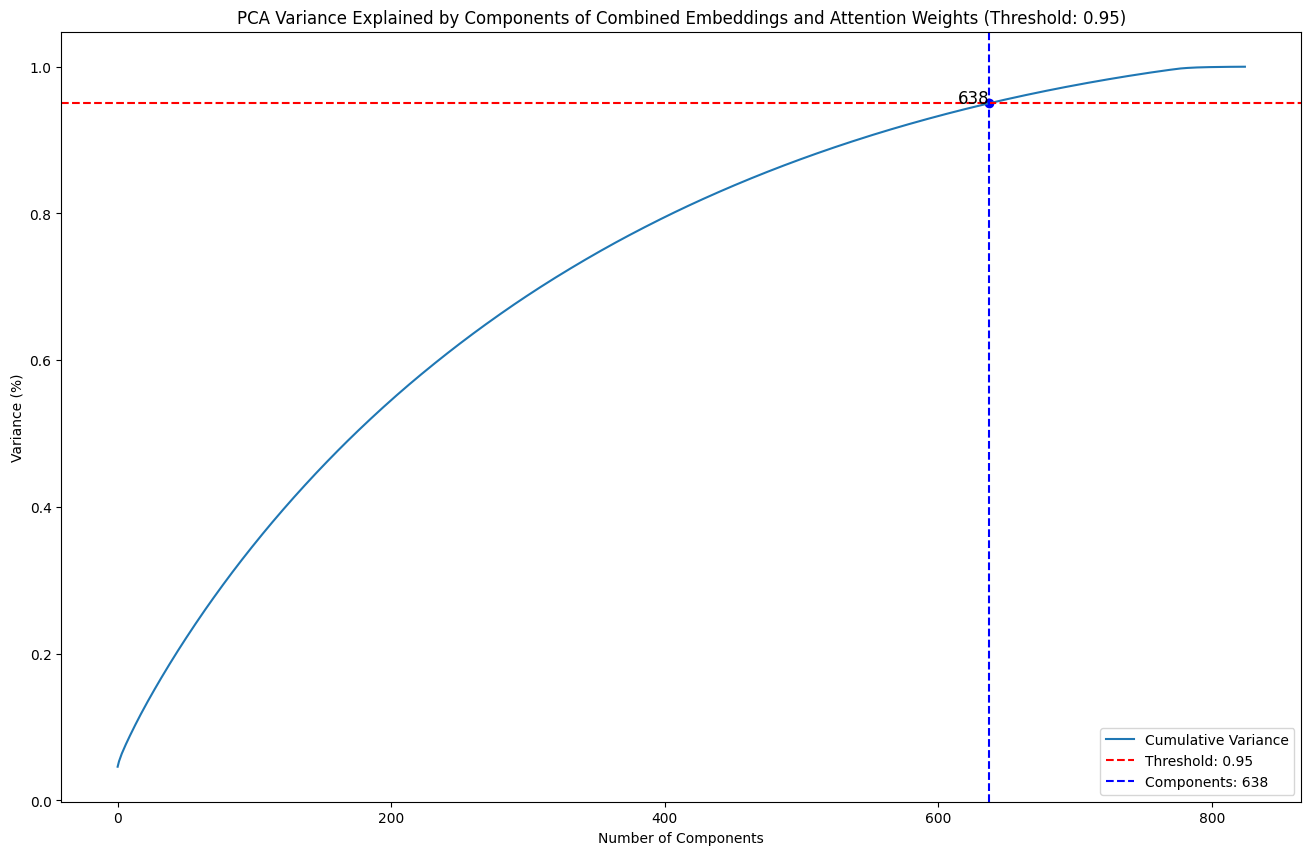

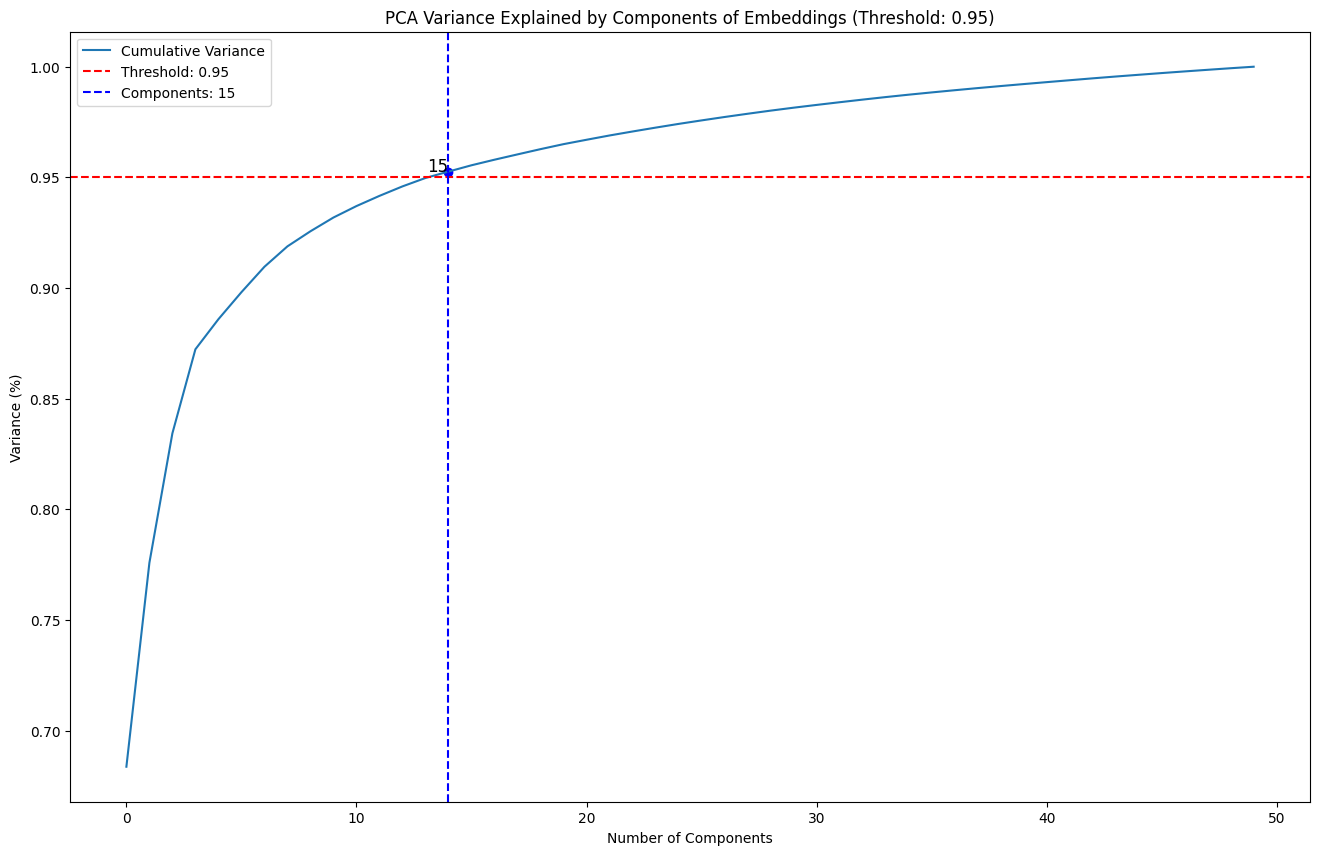

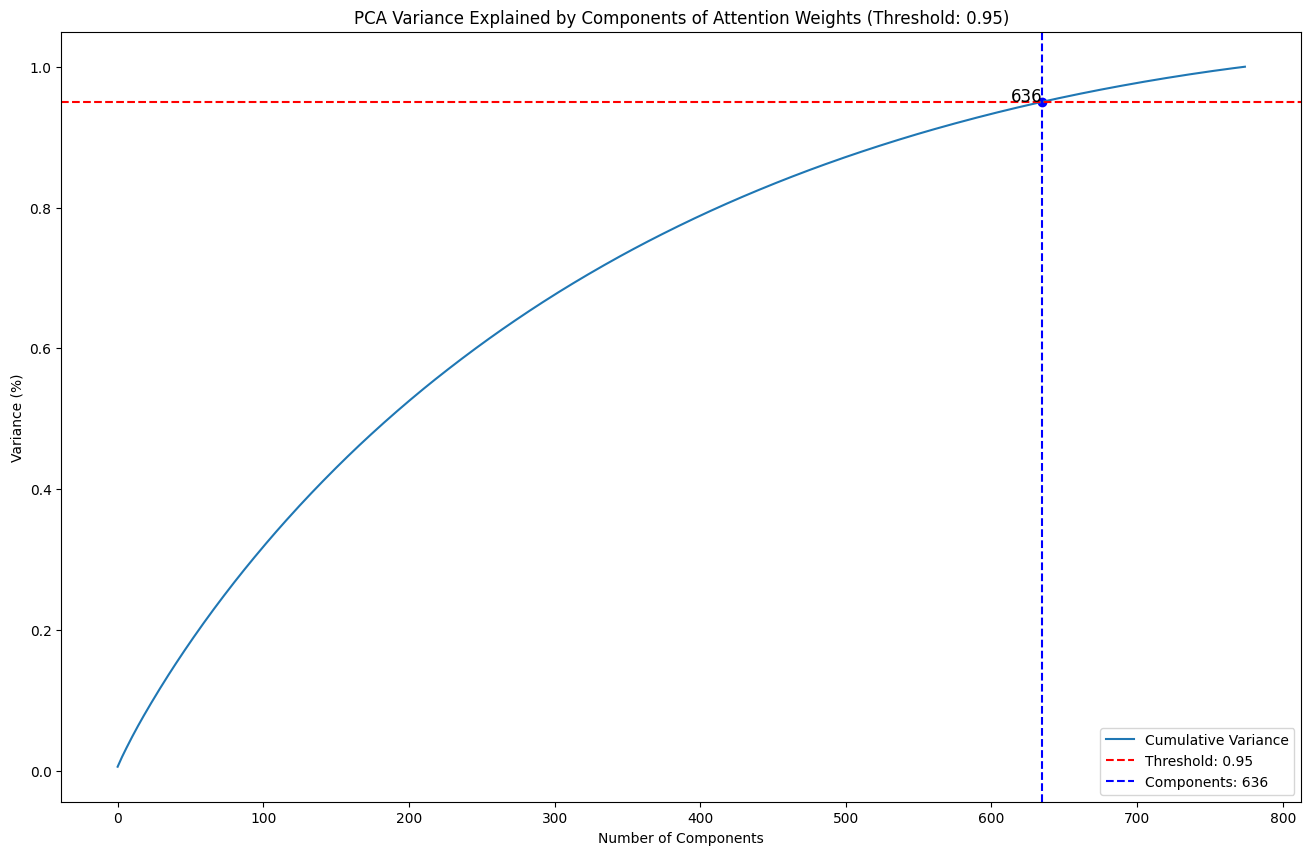

In [22]:
# Create WrappedRepresentationDataset instance (PCA-reduced)
wrapped_dataset_pca_2000_95 = WrappedRepresentationDataset(wrapped_dataset_2000, reduce_method='pca', pca_method='threshold', threshold=0.95, random_projection_dim=2000)

# Plot PCA variance
wrapped_dataset_pca_2000_95.plot_pca_variance(embeddings=True, attention_weights=True)
wrapped_dataset_pca_2000_95.plot_pca_variance(embeddings=True, attention_weights=False)
wrapped_dataset_pca_2000_95.plot_pca_variance(embeddings=False, attention_weights=True)

Converting embeddings and attention weights to NumPy arrays...
Applying dimensionality reduction using pca...
Applying PCA reduction to embeddings
The number of components required to explain the variance using the threshold method (0.98) is:
142
Applying PCA reduction to attention weights
The number of components required to explain the variance using the threshold method (0.98) is:
924


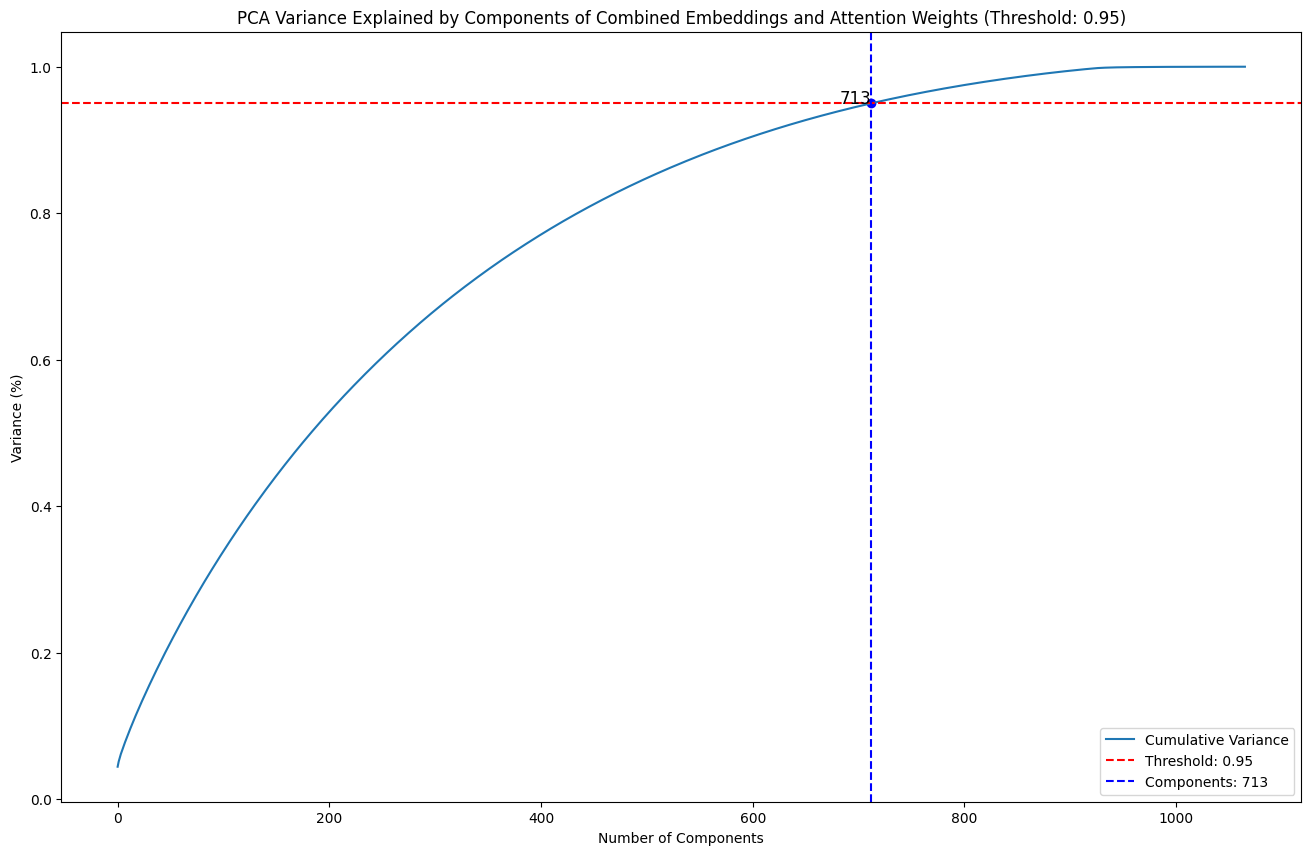

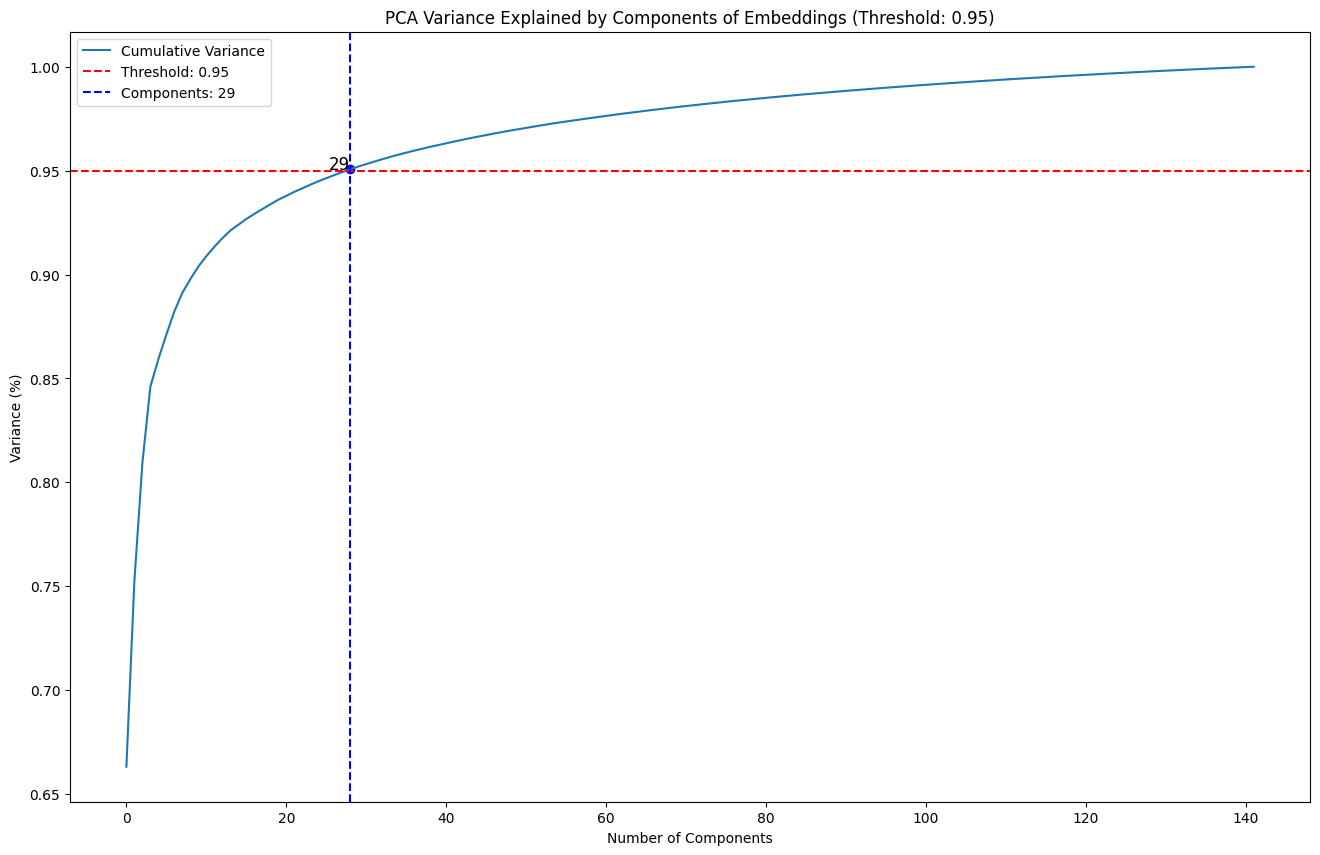

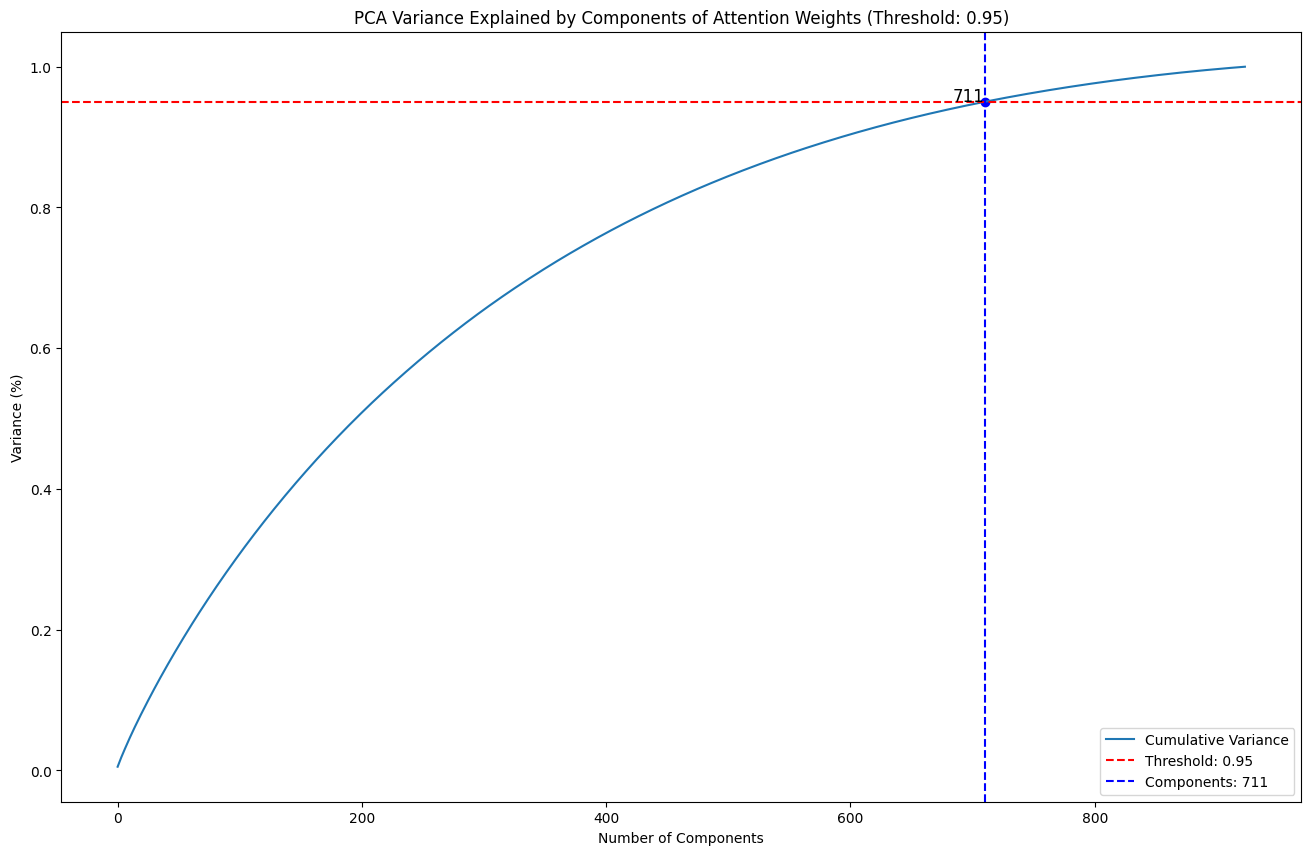

In [23]:
# Create WrappedRepresentationDataset instance (PCA-reduced)
wrapped_dataset_pca_2000_98 = WrappedRepresentationDataset(wrapped_dataset_2000, reduce_method='pca', pca_method='threshold', threshold=0.98, random_projection_dim=2000)

# Plot PCA variance
wrapped_dataset_pca_2000_98.plot_pca_variance(embeddings=True, attention_weights=True)
wrapped_dataset_pca_2000_98.plot_pca_variance(embeddings=True, attention_weights=False)
wrapped_dataset_pca_2000_98.plot_pca_variance(embeddings=False, attention_weights=True)